In [1]:
# Enable autoreload
%load_ext autoreload
%autoreload 2

# Pylint parameters
%config Completer.use_jedi = False

# Measure Runtime
# !pip install ipython-autotime
%load_ext autotime

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

time: 805 µs (started: 2021-04-25 19:22:48 +02:00)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

time: 2.46 s (started: 2021-04-25 19:22:49 +02:00)


In [128]:
!pwd

/home/anneconstance/code/migasar/kaggle-wagon552-shopee/notebooks
time: 1.64 s (started: 2021-04-25 19:11:36 +02:00)


In [3]:
train_data = pd.read_csv('../raw_data/train.csv') 
test_data = pd.read_csv('../raw_data/test.csv')
ss_data = pd.read_csv('../raw_data/sample_submission.csv', index_col = 0)

time: 207 ms (started: 2021-04-25 19:22:55 +02:00)


In [4]:
train_df = train_data.copy()
test_df = train_data.copy()
ss_df = train_data.copy()

time: 8.71 ms (started: 2021-04-25 19:22:57 +02:00)


In [10]:
train_df.size

171250

time: 6.64 ms (started: 2021-04-25 14:42:52 +02:00)


In [11]:
train_df.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

time: 18.7 ms (started: 2021-04-25 14:42:55 +02:00)


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB
time: 30.7 ms (started: 2021-04-25 14:42:58 +02:00)


In [13]:
train_df.describe()

label_group
count  3.425000e+04
mean   2.128611e+09
std    1.234630e+09
min    2.580470e+05
25%    1.050720e+09
50%    2.120410e+09
75%    3.187910e+09
max    4.294197e+09

time: 21.2 ms (started: 2021-04-25 14:43:01 +02:00)


In [14]:
train_df['image'].shape

(34250,)

time: 6.07 ms (started: 2021-04-25 14:43:05 +02:00)


In [15]:
train_df.nunique()

posting_id     34250
image          32412
image_phash    28735
title          33117
label_group    11014
dtype: int64

time: 71.2 ms (started: 2021-04-25 14:43:09 +02:00)


In [16]:
train_df.isna().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

time: 23.4 ms (started: 2021-04-25 14:43:13 +02:00)


In [19]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
from skimage import io
import os

time: 202 ms (started: 2021-04-25 19:23:11 +02:00)


In [6]:
def trans_img(file_name):
    filename = os.path.abspath(os.path.join('../raw_data/train_images', file_name))
    return io.imread(filename)

time: 968 µs (started: 2021-04-25 19:23:13 +02:00)


In [7]:
img_1 = trans_img('00039780dfc94d01db8676fe789ecd05.jpg')

time: 49.9 ms (started: 2021-04-25 19:23:15 +02:00)


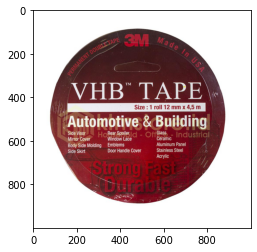

time: 323 ms (started: 2021-04-25 19:23:16 +02:00)


In [8]:
plt.imshow(img_1)

# Image preprocessing

## Resizing

We want to reshape the images in smaller size (state-of-the-art networks are trained on (224,224,3) images / tensors)

In [58]:
from skimage import io
import os

def get_img_size():
    images = [image for image in train_df['image']]
    img_shape = []
    for image in images[11:76]:
        img = trans_img(image)
        x = img.shape
        img_shape.append(x)
        size_img = pd.DataFrame(img_shape)
    return size_img

time: 11.1 ms (started: 2021-04-25 17:06:46 +02:00)


In [59]:
img_size_df = get_img_size()
img_size_df.sort_values(by=0, ascending=False)

0     1  2
9   4501  4500  3
56  1024  1024  3
16  1024  1024  3
15  1024  1024  3
28  1024  1024  3
..   ...   ... ..
64   640   640  3
11   604   604  3
8    595   595  3
2    449   449  3
7    314   314  3

[65 rows x 3 columns]

time: 1.5 s (started: 2021-04-25 17:06:53 +02:00)


In [61]:
max(img_size_df[1]), min(img_size_df[1])

(4500, 314)

time: 4.32 ms (started: 2021-04-25 17:07:00 +02:00)


In [65]:
sizes_set = set(img_size_df[0])
def sizes_ratio():
    for size in sizes_set:
        return img_size_df[0].value_counts()/len(train_df['image'])*100

time: 1.04 ms (started: 2021-04-25 17:07:45 +02:00)


In [66]:
len(sizes_set)

18

time: 3.33 ms (started: 2021-04-25 17:07:47 +02:00)


In [67]:
x = sizes_ratio()
x.sort_values(ascending=False)


640     0.055474
1024    0.043796
700     0.020438
800     0.017518
1000    0.014599
960     0.002920
4501    0.002920
604     0.002920
595     0.002920
720     0.002920
449     0.002920
699     0.002920
650     0.002920
314     0.002920
820     0.002920
669     0.002920
665     0.002920
748     0.002920
Name: 0, dtype: float64

time: 14.1 ms (started: 2021-04-25 17:07:49 +02:00)


In [68]:
def get_unsquarred_ratio() :
    records = img_size_df.to_records(index=False)
    list_sizes = list(records)
    print(list_sizes)
    unsquarred =[]
    for x in list_sizes:
        if x[0]!=x[1]:
            unsquarred.append(x[0])
    return f"Ratio of unsquarred images : {round(len(unsquarred)/len(train_df['image']), 3)*100} %"

time: 1.2 ms (started: 2021-04-25 17:08:04 +02:00)


In [69]:
get_unsquarred_ratio()

[(1000, 1000, 3), (1000, 1000, 3), (449, 449, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (800, 800, 3), (314, 314, 3), (595, 595, 3), (4501, 4500, 3), (700, 700, 3), (604, 604, 3), (665, 665, 3), (700, 700, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (700, 700, 3), (700, 700, 3), (640, 640, 3), (640, 640, 3), (800, 800, 3), (640, 640, 3), (640, 640, 3), (640, 640, 3), (1000, 1000, 3), (1000, 1000, 3), (720, 720, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (700, 700, 3), (699, 699, 3), (800, 800, 3), (640, 640, 3), (700, 700, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (800, 800, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (700, 700, 3), (820, 820, 3), (640, 640, 3), (960, 960, 3), (640, 640, 3), (748, 748, 3), (800, 800, 3), (1024, 1024, 3), (1000, 1000, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (800, 800, 3), (669, 669, 3), (650, 650, 3

'Ratio of unsquarred images : 0.0 %'

time: 20.1 ms (started: 2021-04-25 17:08:09 +02:00)


Turning images into arrays of size (224, 224, 3) 

In [9]:
from PIL import Image

def drop_unsquarred():
    df_squarred = []
    images = [image for image in train_df['image']]
    for image in images:
        image_size=Image.open(f"../raw_data/train_images/{image}").size
        if image_size[0] == image_size[1]:
            df_squarred.append(image)
    return type(df_squarred)

time: 1.44 ms (started: 2021-04-25 19:24:05 +02:00)


In [10]:
df_squarred = drop_unsquarred()
df_squarred

list

time: 21.2 s (started: 2021-04-25 19:24:11 +02:00)


In [133]:
def resize_save_unsquarred():
    img_squarred = []
    for image in df_squarred:
        image_open=Image.open(f"../raw_data/train_images/{image}").resize((224,224))
        image_open.save(f"../raw_data/train_images/resized/{image}")
        img_squarred.append(image_open)
    return img_squarred

time: 3.49 ms (started: 2021-04-25 19:12:15 +02:00)


In [ ]:
img_squarred = resize_save_unsquarred()

In [ ]:
plt.imshow(img_squarred[1100])

In [ ]:
train_df['resized_image'] = pd.read_csv('../raw_data/train_images/resized/train.csv') 

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

# Minimal Network + Common tricks + First hyperparameters tests

model = Sequential()

# First convolution & max-pooling
model.add(layers.Conv2D(100, (10,4), strides=(2,2), input_shape=(28, 28, 1), padding='same'))
model.add(layers.MaxPool2D(pool_size=(3,3)))

# Second convolution & max-pooling
model.add(layers.Conv2D(32, (3,3), strides=(2,2), padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# ––– This is where your Data Scientist skills begin

ValueError: total size of new array must be unchanged, input_shape = [10, 10, 1], output_shape = [25]

time: 16.4 s (started: 2021-04-25 19:00:01 +02:00)


In [100]:
from skimage.transform import resize
from skimage import io
import os

def resize_images():
    images = [image for image in train_df['image']]
    img_shape = []
    for image in images[0:10]:
        image_path =  f'{image}'
        filename = os.path.abspath(os.path.join('../raw_data/train_images', image_path))
        img = io.imread(filename)
        x = img.shape
        img_shape.append(x)
        size_img = pd.DataFrame(img_shape)
        for img in size_img.loc[:,[0, 1]]:
            image_resized = resize(img, (img[0] // 5000 * 100, img[1] // 5000 * 100), anti_aliasing=True)
    return train_df['image']

time: 183 ms (started: 2021-04-25 17:30:27 +02:00)


In [101]:
resize_images()

TypeError: 'int' object is not subscriptable

time: 52.6 ms (started: 2021-04-25 17:30:29 +02:00)


## Intensity normalization

Neural networks converge faster if the inputs are somewhat normalized. Therefore we want to transform the image pixels with values between 0 and 255 (for each color) into values between -1 and 1, thanks to Keras libraries (or just by dividing all the data by 255)

## Data augmentation

Creation of additionnal data to explore : 
- Mirror
- Crop
- rotations
- slight transformation of the colors
- change of the textures
- "photoshop effects": blur, halo, ...
- deformations
- ...

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

model = Sequential()
model.add(Reshape((5*5*1,), input_shape=(5,5,1)))  # This flattens the (5, 5, 1) image to a vector of size 25
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax')) 

# Preprocessing on titles 

In [89]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


- Lowercase
- remove numbers
- remove punctuation
- remove stop words
- select important words with stemmer

In [18]:
#labels
print(f"label_group unique values: {train_df['label_group'].nunique()}")

label_group unique values: 11014
time: 3.32 ms (started: 2021-04-25 14:44:09 +02:00)


In [21]:
groups_df = train_df["label_group"].value_counts().reset_index()
groups_df.columns = ["group", "count"]
print("Max no. of apparitions in 1 group: {}".format(groups_df["count"].max()), "\n" +
      "Min no. of apparitions in 1 group: {}".format(groups_df["count"].min()))

Max no. of apparitions in 1 group: 51 
Min no. of apparitions in 1 group: 2
time: 5.75 ms (started: 2021-04-25 14:52:07 +02:00)


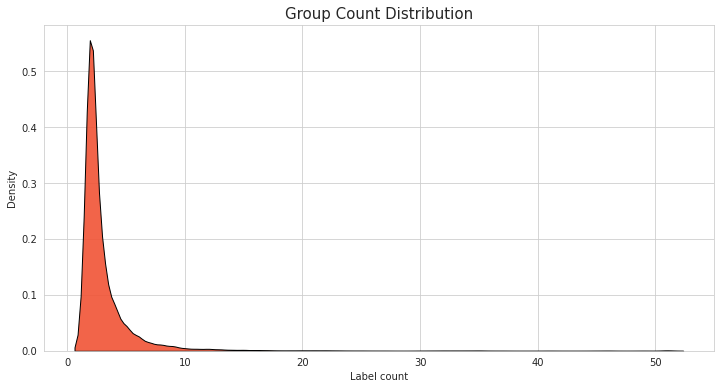

time: 454 ms (started: 2021-04-25 14:52:49 +02:00)


In [22]:
# Plot labels distribution
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.title('Group Count Distribution', fontsize = '15')
sns.kdeplot(groups_df['count'], fill = True, 
            color = '#f15335', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Label count')
plt.show();

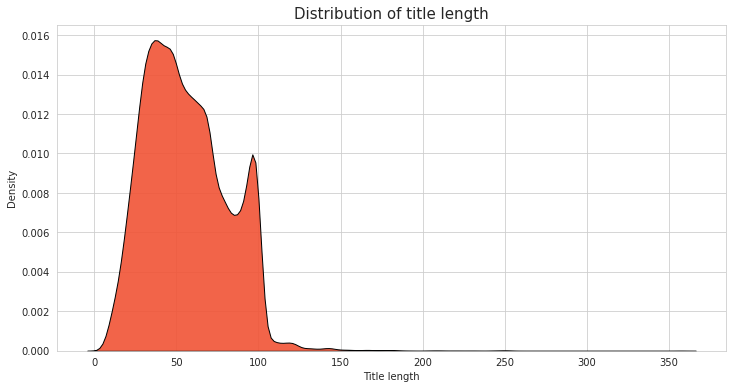

time: 524 ms (started: 2021-04-25 14:53:44 +02:00)


In [23]:
# Plot titles length distribution
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.title('Distribution of title length', fontsize = '15')
sns.kdeplot(train_df['title'].apply(lambda x: len(x)), fill = True, 
            color = '#f15335', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Title length')
plt.show();

In [40]:
!pip install -U textblob
!python -m textblob.download_corpora

You should consider upgrading via the '/home/anneconstance/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.
[nltk_data] Downloading package brown to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Unzipp

In [46]:
import string 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

unpreproc_title = train_df["title"][1]
print(f"Before: {unpreproc_title}")
lower_title = unpreproc_title.lower()
print(f"Lower case: {lower_title}")
punct = "!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]:"
rem_punct = lower_title.translate(str.maketrans('','',string.punctuation))
print(f"Remove punctuation: {rem_punct}")
rem_whitespaces = rem_punct.strip()
print(f"Remove whitespaces: {rem_whitespaces}")
tokenize = word_tokenize(rem_whitespaces)
print(f"Tokenized: {tokenize}")
rem_stop_words = [word for word in tokenize if not word in stopwords.words()]
print(f"Remove stopwords: {rem_stop_words}")
lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in rem_stop_words]
print(f"Lemmatization: {lemmatized_text}")
pos_text = TextBlob(' '.join(lemmatized_text))
print(f"Part_Of_Speech: {pos_text.tags}")


Before: Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE
Lower case: double tape 3m vhb 12 mm x 4,5 m original / double foam tape
Remove punctuation: double tape 3m vhb 12 mm x 45 m original  double foam tape
Remove whitespaces: double tape 3m vhb 12 mm x 45 m original  double foam tape
Tokenized: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'm', 'original', 'double', 'foam', 'tape']
Remove stopwords: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'original', 'double', 'foam', 'tape']
Lemmatization: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'original', 'double', 'foam', 'tape']
Part_Of_Speech: [('double', 'JJ'), ('tape', 'NN'), ('3m', 'CD'), ('vhb', 'NN'), ('12', 'CD'), ('mm', 'NN'), ('x', 'VBD'), ('45', 'CD'), ('original', 'JJ'), ('double', 'JJ'), ('foam', 'NN'), ('tape', 'NN')]
time: 81 ms (started: 2021-04-25 15:24:19 +02:00)


In [48]:
def preproc_title(title):
    title = title.lower()
    title = title.translate(str.maketrans('','',string.punctuation))
    title = title.strip()
    tokens_title = word_tokenize(title)
    tokens_title = [word for word in tokens_title if not word in stopwords.words()]
    lemmatizer = WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(word) for word in tokens_title]
    preproc_title = ' '.join(lemm_text)
    return preproc_title

def get_part_of_speech(prepped_title):
    part_of_speech = TextBlob(prepped_title)
    part_of_speech = ' '.join([j for (i, j) in pos_text.tags])
    return part_of_speech

time: 1.2 ms (started: 2021-04-25 15:25:13 +02:00)


In [49]:
train_df["preproc_title"] = train_df["title"].apply(lambda x: preproc_title(x))

time: 23min 43s (started: 2021-04-25 15:25:14 +02:00)


In [50]:
train_df["part_of_speech"] = train_df["preproc_title"].apply(lambda x: get_part_of_speech(x))

time: 325 ms (started: 2021-04-25 15:49:00 +02:00)


In [ ]:
# Read in prepped data
# train_df_prep = pd.read_csv("../raw_data/shopee-preprocessed-data/train_title_prepped.csv")
# train_df_prep["label_group"] = train_df_prep["label_group"].astype(str)